<a href="https://colab.research.google.com/github/rman1061/Avocado/blob/main/Cleaned_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install xgboost

In [ ]:
pip install --upgrade xgboost

     |████████████████████████████████| 173.6 MB 8.0 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load data
dataset = pd.read_csv(r'/content/ResultsRM.csv')

In [ ]:
dataset

,Volume,UV 1_280,Cond,ConcB,"UV 1_280_CUT_TEMP@100,BASEM",UV 2_214,UV 3_400,pH,PreCpressure,DeltaCpressure,Systempressure,Samplepressure,Systemflow,PostCpressure,Systemlinearflow,Sampleflow,Samplelinearflow,UVcellpathlength,Sampleflow(CV/h),Systemflow(CV/h),%Cond,Condtemp
0,-104.22000,-0.000619,0.000000,0.0,-0.00616,0.000000,0.000000,0.000000,0.050203,-0.006336,0.047688,0.018317,0.000000,0.056538,0.000000,0,0,0.2,0,0,0.000000,11.337036
1,-104.04036,-0.241520,0.062173,100.0,-0.00616,3.250863,-0.024730,0.000000,0.398312,-0.002606,0.441999,0.021899,2.578004,0.402431,0.000000,0,0,0.2,0,0,0.058834,11.197743
2,-103.86072,-0.111017,0.000000,100.0,-0.00616,3.365043,0.027350,0.000000,0.444515,0.002386,0.493844,0.023540,3.855613,0.442679,0.000000,0,0,0.2,0,0,0.027682,10.954434
3,-103.68108,0.028824,0.000000,100.0,-0.00616,3.577096,0.078766,0.000000,0.455929,-0.004892,0.523921,0.024318,4.822435,0.461505,0.000000,0,0,0.2,0,0,0.000000,10.803707
4,-103.50144,-0.005871,0.000000,100.0,-0.00616,3.571263,0.073044,0.000000,0.470259,-0.004974,0.549787,0.025212,5.635168,0.476141,0.000000,0,0,0.2,0,0,0.000000,10.705510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,74.52180,-1.076219,1.646803,100.0,NaN,1.875684,-0.741599,8.185095,0.450227,0.120635,0.456815,0.144471,0.941894,0.329593,146.718057,0,0,0.2,0,0,1.669656,9.404155
996,74.70144,-1.064920,1.483746,100.0,NaN,1.895792,-0.733404,8.209356,0.450725,0.120603,0.458853,0.144145,0.937642,0.330139,146.081267,0,0,0.2,0,0,1.503596,9.390910
997,74.88108,-1.047101,1.339341,100.0,NaN,1.944145,-0.727544,8.233391,0.449700,0.119896,0.462030,0.145694,0.939196,0.329910,146.520756,0,0,0.2,0,0,1.357217,9.375718
998,75.06072,-1.036792,1.210525,100.0,NaN,1.952511,-0.699437,8.256658,0.450732,0.120218,0.458549,0.148835,0.936876,0.330576,145.865395,0,0,0.2,0,0,1.226439,9.362844


In [ ]:
dataset.head()

,Volume,UV 1_280,Cond,ConcB,"UV 1_280_CUT_TEMP@100,BASEM",UV 2_214,UV 3_400,pH,PreCpressure,DeltaCpressure,Systempressure,Samplepressure,Systemflow,PostCpressure,Systemlinearflow,Sampleflow,Samplelinearflow,UVcellpathlength,Sampleflow(CV/h),Systemflow(CV/h),%Cond,Condtemp
0,-104.22000,-0.000619,0.000000,0.0,-0.00616,0.000000,0.000000,0.0,0.050203,-0.006336,0.047688,0.018317,0.000000,0.056538,0.0,0,0,0.2,0,0,0.000000,11.337036
1,-104.04036,-0.241520,0.062173,100.0,-0.00616,3.250863,-0.024730,0.0,0.398312,-0.002606,0.441999,0.021899,2.578004,0.402431,0.0,0,0,0.2,0,0,0.058834,11.197743
2,-103.86072,-0.111017,0.000000,100.0,-0.00616,3.365043,0.027350,0.0,0.444515,0.002386,0.493844,0.023540,3.855613,0.442679,0.0,0,0,0.2,0,0,0.027682,10.954434
3,-103.68108,0.028824,0.000000,100.0,-0.00616,3.577096,0.078766,0.0,0.455929,-0.004892,0.523921,0.024318,4.822435,0.461505,0.0,0,0,0.2,0,0,0.000000,10.803707
4,-103.50144,-0.005871,0.000000,100.0,-0.00616,3.571263,0.073044,0.0,0.470259,-0.004974,0.549787,0.025212,5.635168,0.476141,0.0,0,0,0.2,0,0,0.000000,10.705510


In [ ]:
y= dataset.Condtemp


In [ ]:
x=dataset.drop('Condtemp',axis=1)


In [ ]:
x.head()

,Volume,UV 1_280,Cond,ConcB,"UV 1_280_CUT_TEMP@100,BASEM",UV 2_214,UV 3_400,pH,PreCpressure,DeltaCpressure,Systempressure,Samplepressure,Systemflow,PostCpressure,Systemlinearflow,Sampleflow,Samplelinearflow,UVcellpathlength,Sampleflow(CV/h),Systemflow(CV/h),%Cond
0,-104.22000,-0.000619,0.000000,0.0,-0.00616,0.000000,0.000000,0.0,0.050203,-0.006336,0.047688,0.018317,0.000000,0.056538,0.0,0,0,0.2,0,0,0.000000
1,-104.04036,-0.241520,0.062173,100.0,-0.00616,3.250863,-0.024730,0.0,0.398312,-0.002606,0.441999,0.021899,2.578004,0.402431,0.0,0,0,0.2,0,0,0.058834
2,-103.86072,-0.111017,0.000000,100.0,-0.00616,3.365043,0.027350,0.0,0.444515,0.002386,0.493844,0.023540,3.855613,0.442679,0.0,0,0,0.2,0,0,0.027682
3,-103.68108,0.028824,0.000000,100.0,-0.00616,3.577096,0.078766,0.0,0.455929,-0.004892,0.523921,0.024318,4.822435,0.461505,0.0,0,0,0.2,0,0,0.000000
4,-103.50144,-0.005871,0.000000,100.0,-0.00616,3.571263,0.073044,0.0,0.470259,-0.004974,0.549787,0.025212,5.635168,0.476141,0.0,0,0,0.2,0,0,0.000000


In [ ]:
y.head()

0    11.337036
1    11.197743
2    10.954434
3    10.803707
4    10.705510
Name: Condtemp, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
print("shape of original dataset :", dataset.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (1000, 22)
shape of input - training set (800, 21)
shape of output - training set (800,)
shape of input - testing set (200, 21)
shape of output - testing set (200,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[04:03:04] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.277135


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[04:03:06] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:06] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:06] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.059295,0.015869,8.059205,0.036896
1,7.263421,0.014332,7.263325,0.038480
2,6.547819,0.012953,6.547716,0.039904
3,5.904560,0.011721,5.904448,0.041181
4,5.326511,0.010617,5.326391,0.042323


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))


49    0.256999
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[04:21:07] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


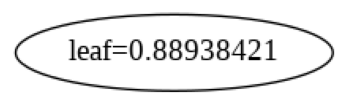

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

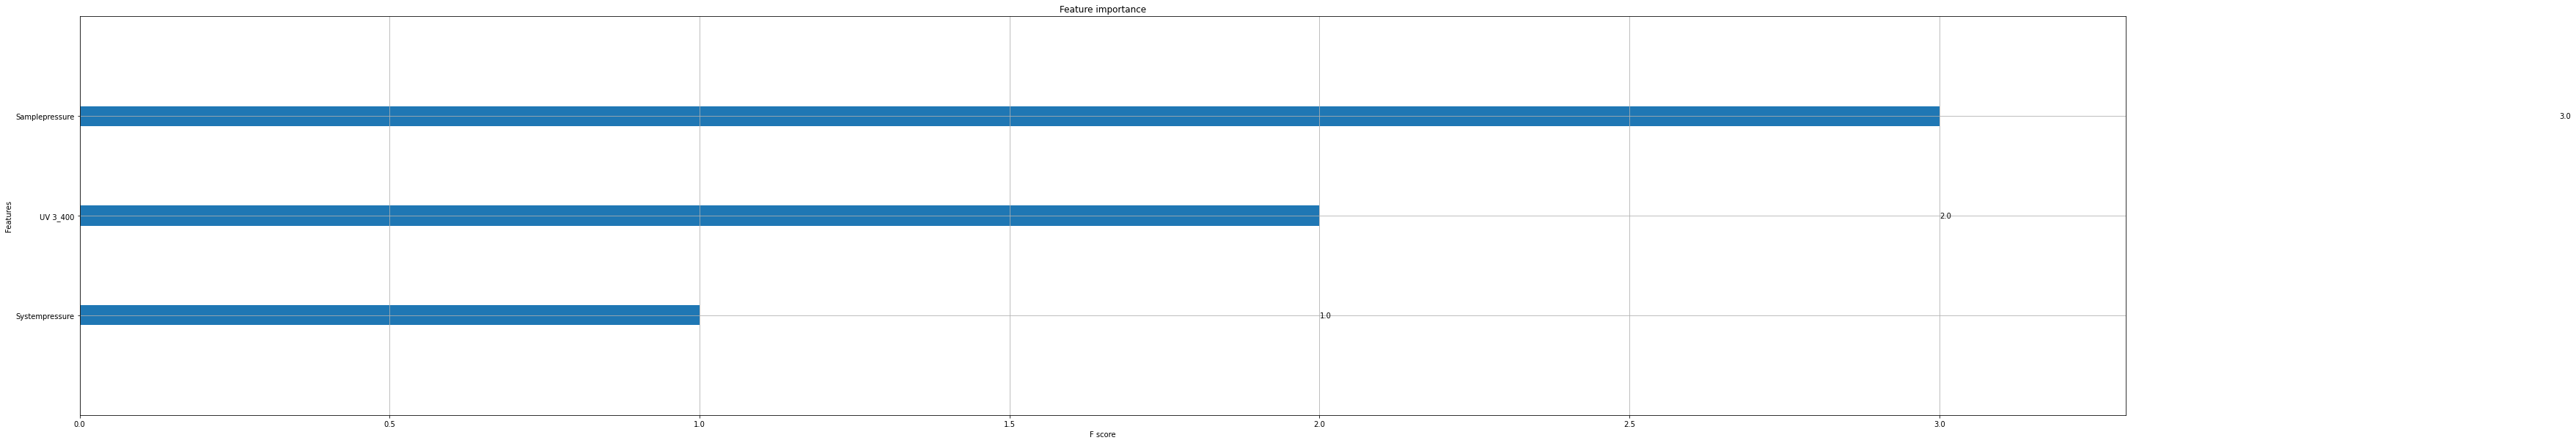

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()